In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

The first question calls for comparison between a numerical and analytical derivative using numpy. The relative error between the numerical and analytical error is shown using a matplotlib loglog plot.

In [ ]:
def deriv(f, x0, h):
    return (f(x0+h)-f(x0-h))/(2*h)

In [11]:
# computing for f = sin(x), and x0 = 0.1
h_vals = np.linspace(0.0001, 1, 100)
x0 = np.array([0.1])
d_numerical = deriv(np.sin, x0, h_vals)
d_analytical = np.cos(x0)

In [13]:
d_err = np.absolute(d_numerical-d_analytical)/d_analytical

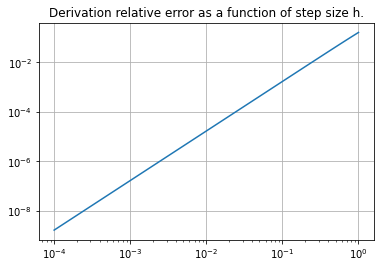

In [14]:
fig, ax = plt.subplots()
ax.loglog(h_vals, d_err)
ax.set_xscale('log', base=10)
ax.set(title='Derivation relative error as a function of step size h.')
ax.grid()
plt.show()

we see that the relative derivation error is linearly correlated to the derivation step size. The slope represents the accuracy of the numerical derivation with respect to the step size. 

## Question 2

We define a complex recursive function and study its behaviour as we iterate through it.

In [15]:
def eq2(z, c):
    return c+(z**2)

In [121]:
z = np.zeros((100, 100))
x, y = np.meshgrid(np.linspace(-2, 2, 100), 1j*np.linspace(-2, 2, 100))
c = x + y
c.shape

n_iter = 9
color_mask = np.zeros((100, 100))
while n_iter:
    z = eq2(z, c)
    new_unbounded = np.where((np.absolute(z)**2 >= (z.real**2 + z.imag**2)), 0, 1)
    new_unbounded *= np.where(color_mask == 0, 1, 0)
    n_iter -=1
    color_mask[np.nonzero(new_unbounded)] = 9-n_iter

In [122]:
bounded, unbounded = np.where(np.absolute(z)**2 >= (z.real**2 + z.imag**2), 1, 0), np.where(np.absolute(z)**2 >= (z.real**2 + z.imag**2), 0, 1)

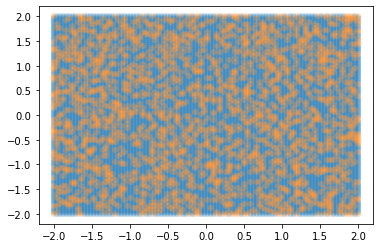

In [123]:
fig, ax = plt.subplots()
ax.scatter(
    c[np.nonzero(bounded)].real, 
    c[np.nonzero(bounded)].imag, 
    color='tab:blue', 
    alpha=0.3, 
    edgecolors='none'
)
ax.scatter(
    c[np.nonzero(unbounded)].real, 
    c[np.nonzero(unbounded)].imag, 
    color='tab:orange', 
    alpha=0.3, 
    edgecolors='none'
)
plt.show()

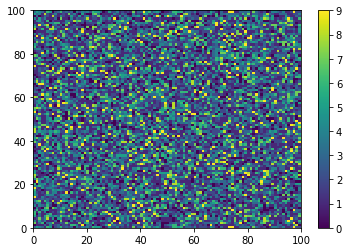

In [129]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(color_mask)
fig.colorbar(pcm, ax=ax)
plt.show()

## Question 3

In this question we make disease spread simulation using the SIR model.

In [180]:
from scipy.integrate import solve_ivp

N = 1000
t0, t1 = 0, 200
t = np.arange(t0, t1)
gammas = [5, 25]
betas = [0.05, 0.15]
I0 = 1
S0 = 999
R0 = 0

y0 = np.array([I0, S0, R0])

def SIR_system(t, y, N, beta, gamma):
    I, S, R = y
    return np.array([
        -beta*S*I/N,
        (beta*I*S/N)-gamma*I,
        gamma*I
    ])

In [181]:
def solve_SIR_ivp(y0, N, beta, gamma):
    return solve_ivp(
        fun=lambda t, y: SIR_system(t, y, N, beta, gamma),
        t_span=(t0,t1),
        y0=y0,
    )

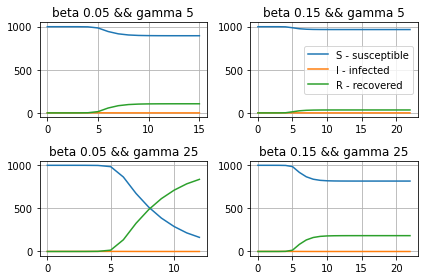

In [188]:
fig, axs = plt.subplots(len(gammas), len(betas))

for i in range(len(gammas)):
    for j in range(len(betas)):
        sol_I, sol_S, sol_R = solve_SIR_ivp(y0, N, betas[j], gammas[i]).y
        t = np.arange(sol_I.shape[0])
        axs[i, j].plot(t, sol_S, label='S - susceptible')
        axs[i, j].plot(t, sol_I, label='I - infected')
        axs[i, j].plot(t, sol_R, label='R - recovered')
        axs[i, j].set_title(f'beta {betas[j]} && gamma {gammas[i]}')
        axs[i, j].grid(True)

axs[0, 1].legend()
fig.tight_layout()
plt.show()